# Introduction to Machine Learning: Supervised Learning Final Project
## Diabetes Classification in the Pima Indian Population

### Problem Description

The prevalence of non-insulin dependent diabetes mellitis (hereafter referred to as NIDDM) among American Indians / Alaska Natives is currently the highest of any ethnic group in the United States, at approximately 16% of the population. As a subset of this high-risk group, Pima (or O'odham) Indians have had some of the highest recorded incidence of the disease of any population worldwide, reaching over 40% among Pimas over age 35 by the early 1970's. Though the epidemic has abated somewhat in the past half century, the problem remains pervasive among the contemporary Pima population. 

Here, I take an exploratory and comparative approach, utilizing several of the classification techniques that we've covered in this course to create a model that accurately predicts occurrences of diabetes using the "Pima Indians Diabetes Database", originally published by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). These data are the result of a long-term cohort study that began in 1965. The sample population is made up of a group of 768 female members of the Pima Indian tribe, all of at least 21 years of age.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [2]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 features of this dataset, all of which are numerical and do not contain traditional, pandas-recognized null values. The response, "Outcome", is coded as a 1 or a 0 based on whether the patient was diabetic. 

In [4]:
print("Number of diabetic patients:", sum(df['Outcome']==1))
print("Number of non-diabetic patients:", sum(df['Outcome']==0))


Number of diabetic patients: 268
Number of non-diabetic patients: 500


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns: 
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())
    
    

Pregnancies 0 0
Glucose 0 0
BloodPressure 0 0
SkinThickness 0 0
Insulin 0 0
BMI 0 0
DiabetesPedigreeFunction 0 0
Age 0 0
Outcome 0 0


These additional null-value searches allow us to conclude that the datasets do not contain any null-valued entries. 

In [7]:
response = df['Outcome'].value_counts()

print("Number of diabetic subjects:", response[1])
print("Number of non-diabetic subjects:", response[0])

Number of diabetic subjects: 268
Number of non-diabetic subjects: 500


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This breakdown confirms that all features of the dataset are numerical and real-valued. We can see here, though, that certain features (*Glucose, BloodPressure, SkinThickness, Insulin*, and *BMI*)  do seem to have illogical 0 values.

In [9]:
print("Count of Glucose 0-values:", sum(df['Glucose']==0))
print("Count of BloodPressure 0-values:", sum(df['BloodPressure']==0))
print("Count of SkinThickness 0-values:", sum(df['SkinThickness']==0))
print("Count of Insulin 0-values:", sum(df['Insulin']==0))
print("Count of BMI 0-values:", sum(df['BMI']==0))

Count of Glucose 0-values: 5
Count of BloodPressure 0-values: 35
Count of SkinThickness 0-values: 227
Count of Insulin 0-values: 374
Count of BMI 0-values: 11


Since it is logically impossible that these columns would have a value of 0, we can treat these values as effectively null. We will have to either delete or impute. 

In the absence of metadata to the contrary, we can assume that the missing values are Missing at Random (MAR). Since all of the above features are numerical and continuous, we will use the mean/median imputation method to replace the missing values. 

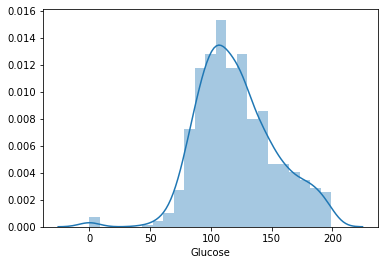

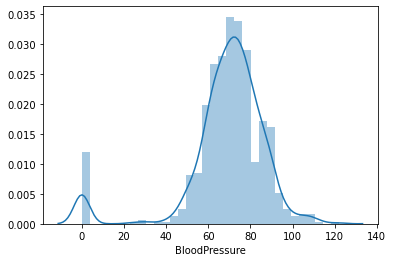

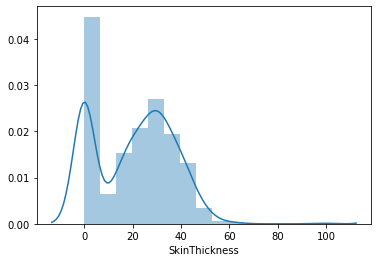

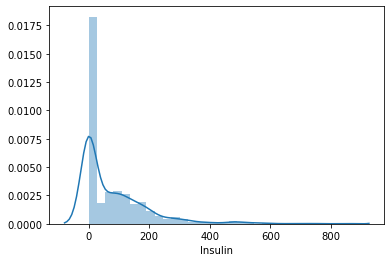

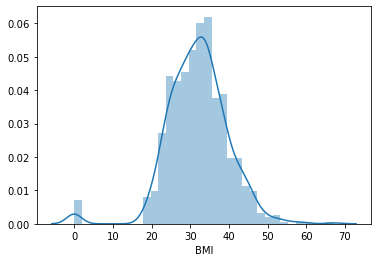

In [10]:
to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in to_impute:
    sns.distplot(df[col])
    plt.show()

From these density plots, we can see that the distributions of BloodPressure, and SkinThickness, and BMI have a roughly symmetrical distribution, whereas Insulin and Glucose both seem to skew right. We will impute using the mean values for the symmetric features and median values for the asymmetric features. Before we do so, we will first identify the outliers as well, in order to include those in our imputations. 

In [11]:
sym_col = ['BloodPressure', 'SkinThickness', 'BMI']
asym_col = ['Insulin', 'Glucose']

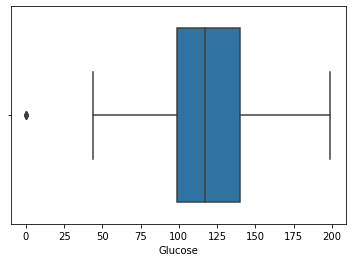

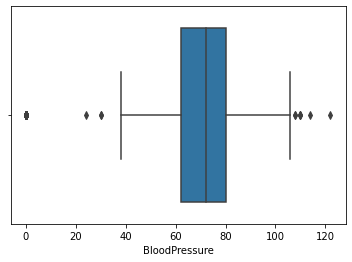

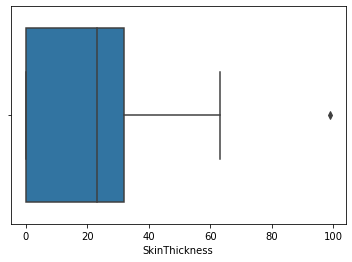

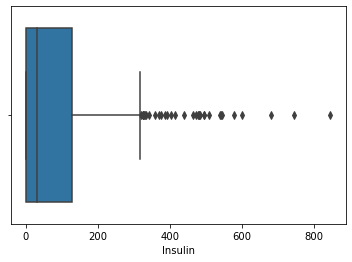

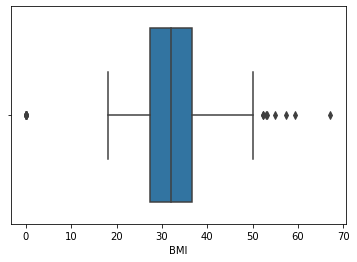

In [12]:
for col in to_impute:
    sns.boxplot(df[col])
    plt.show()

From these swarmplots, we can pick out a few upper outliers that may be erroneous and affecting the veracity of our data. Out of an abundance of caution, we will replace these as well with the mean or median values (as determined by the data distribution). 

In [13]:
# Set the cutoffs for current outliers
skin_outlier_upr = df['SkinThickness'][df['SkinThickness']!=0].max()
insulin_outlier_upr = df['Insulin'][df['Insulin']>600].min()
bmi_outlier_upr = df['BMI'][df['BMI']>60].min()

In [14]:
# Replace those outliers and 0 values with the mean/median of the respective feature

glucose_median = df['Glucose'][df['Glucose']>0].median()
insulin_median = df['Insulin'][(df['Insulin']>0) & (df['Insulin']<insulin_outlier_upr)].median()
bloodpress_mean = df['BloodPressure'][df['BloodPressure']>0].mean()
skin_mean = df['SkinThickness'][(df['SkinThickness']>0) & (df['SkinThickness']<skin_outlier_upr)].mean()
bmi_mean = df['BMI'][(df['BMI']>0) & (df['BMI']<bmi_outlier_upr)].mean()

df['Glucose'] = df['Glucose'].where(df['Glucose']!=0, glucose_median)
df['Insulin'] = df['Insulin'].where((df['Insulin']!=0) & (df['Insulin']<insulin_outlier_upr), insulin_median)
df['BloodPressure'] = df['BloodPressure'].where(df['BloodPressure']!=0, bloodpress_mean)
df['SkinThickness'] = df['SkinThickness'].where((df['SkinThickness']!=0) & (df['SkinThickness']<skin_outlier_upr), skin_mean)
df['BMI'] = df['BMI'].where((df['BMI']!=0) & (df['BMI']<bmi_outlier_upr), bmi_mean)



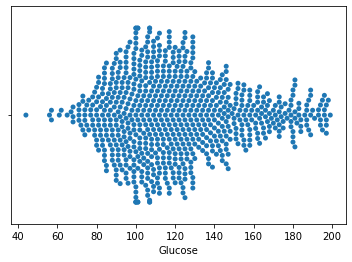

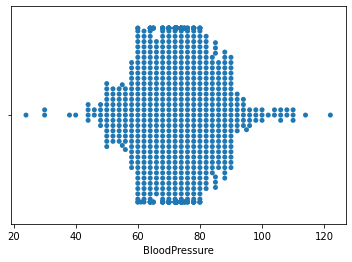

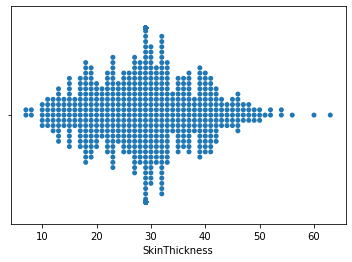

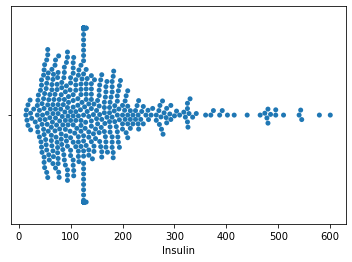

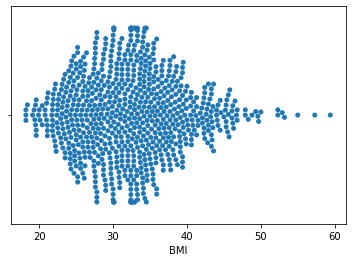

In [15]:
for col in to_impute:
    sns.swarmplot(df[col])
    plt.show()

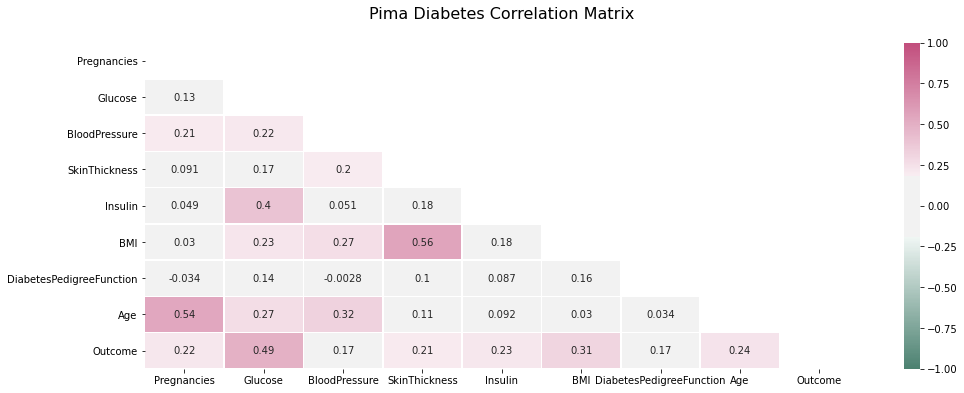

In [16]:
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(df.corr(), 
                            dtype = np.bool))
cmap = sns.diverging_palette(162, 
                              350, 
                              s = 60, 
                              l = 50, 
                              sep = 48, 
                              n = 16,
                              as_cmap = True)
heatmap = sns.heatmap(df.corr(), 
                      mask = mask, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True,
                      cmap = cmap, 
                      linewidths = 0.5)
heatmap.set_title('Pima Diabetes Correlation Matrix', 
                  fontdict = {'fontsize':16}, 
                  pad = 24)
plt.show()

From the above correlation matrix, we can see some moderately strong correlations between features - Age/Pregnancies, BMI/SkinThickness, and Glucose/Insulin, to name a few. In addition, we can see that the response ("Outcome") is most highly correlated with Glucose. 

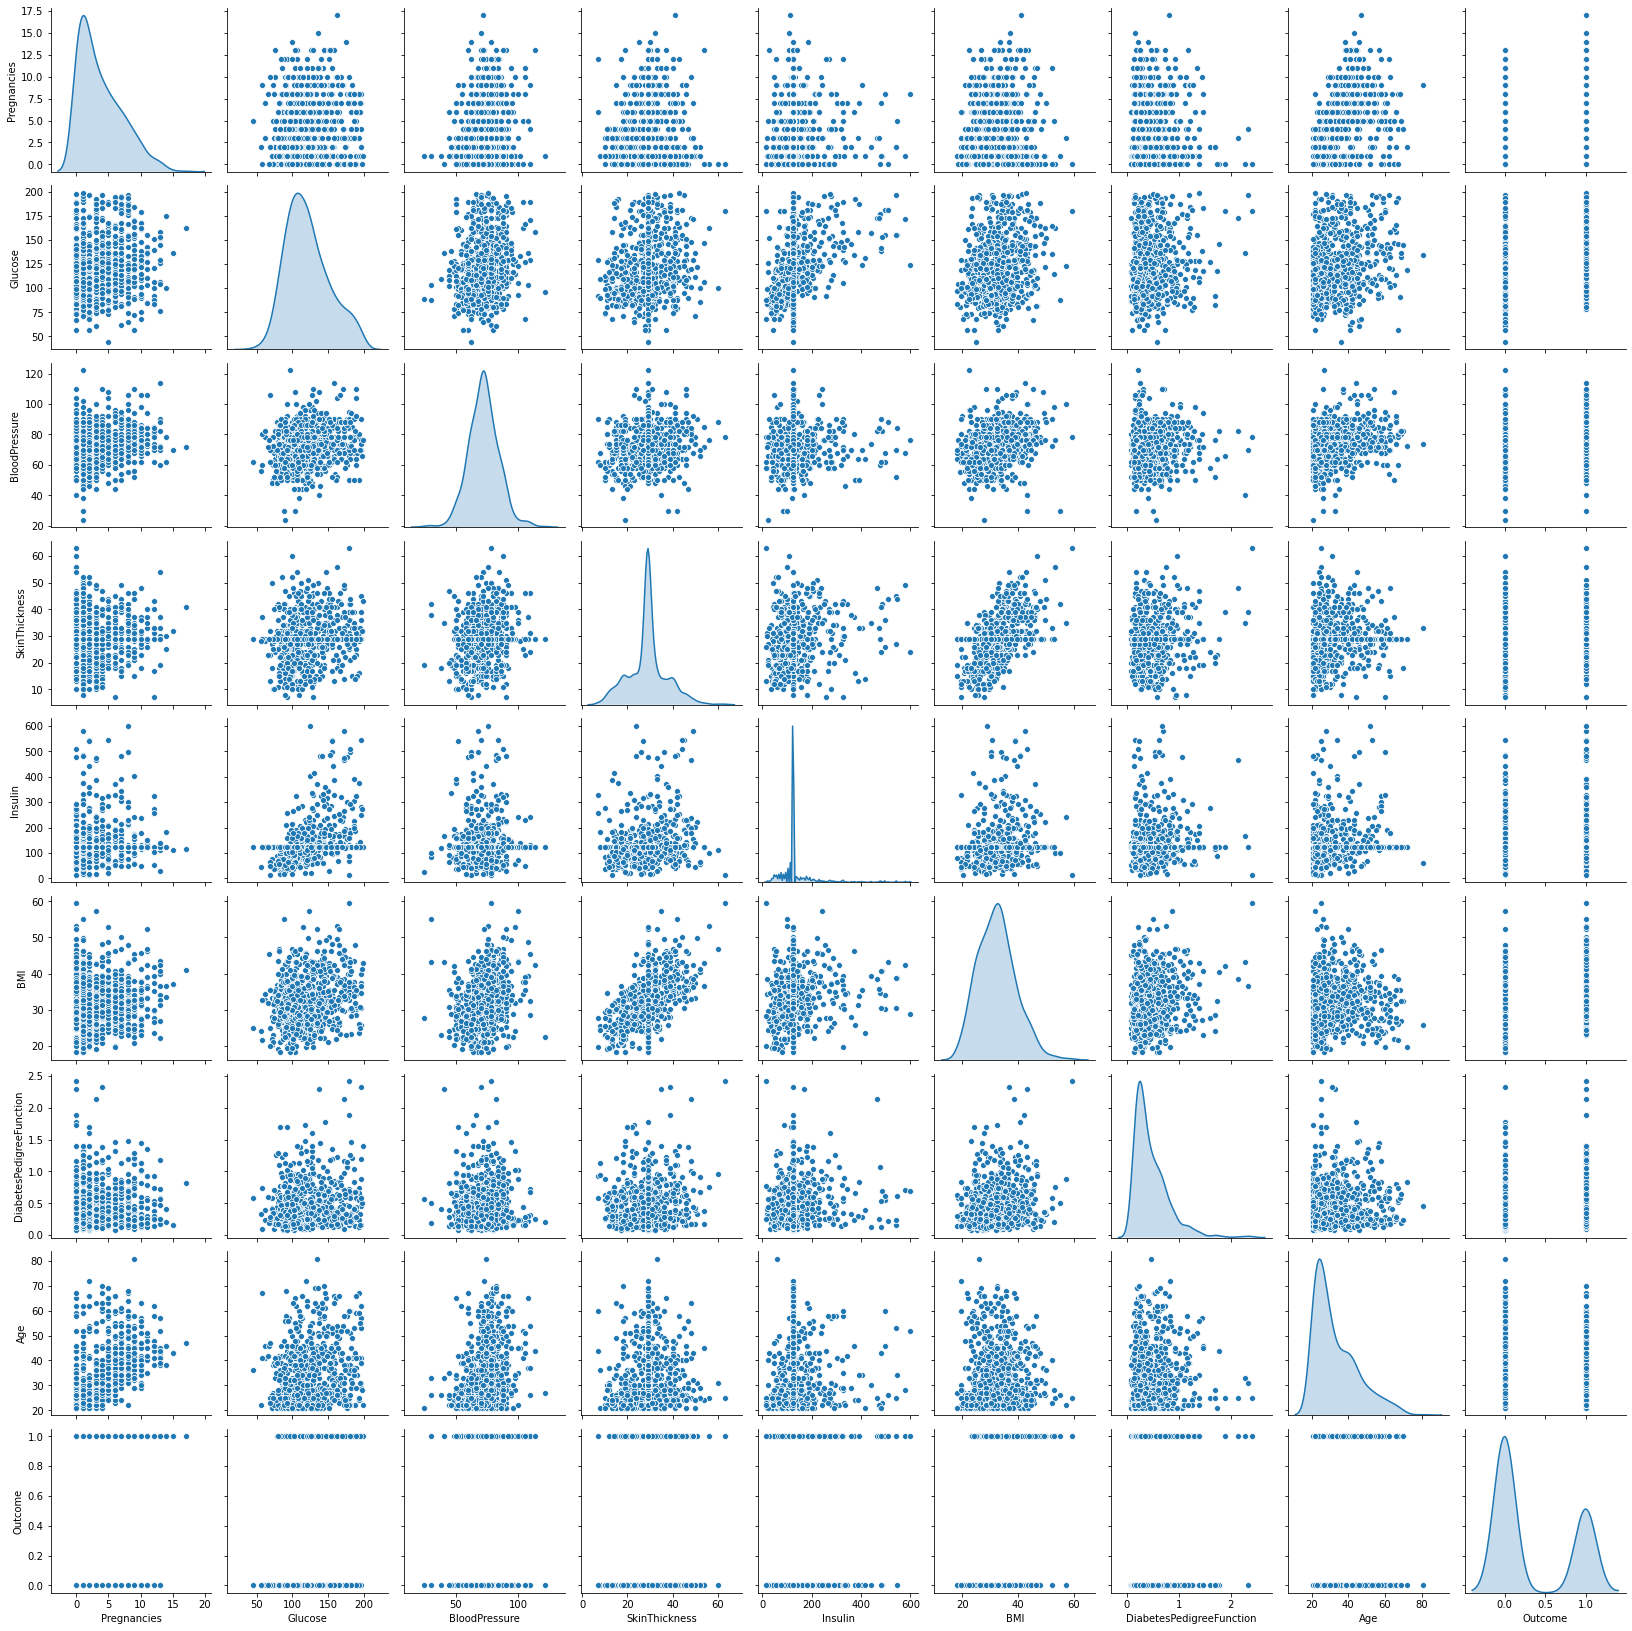

In [17]:
pairs = sns.pairplot(df, diag_kind = 'kde')

This pairplot confirms our observations from the correlation matrix. A few of the features are have a discernable trend, but it appears to be slight. Uncorrelated clusters predominate, which confirms that we should be able to proceed with few collinearity issues. 

### Model Building and Results

In [18]:
# Dividing the dataset into training and test data

y = df['Outcome']
X = df.loc[:, df.columns!='Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

print("Size of training dataset:", len(X_train), "rows")
print("Size of testing dataset:", len(X_test), "rows")

Size of training dataset: 614 rows
Size of testing dataset: 154 rows


#### Decision Tree 

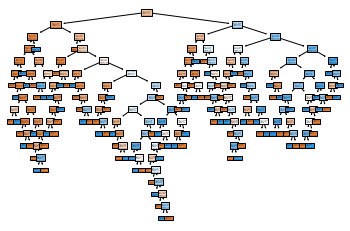

Decision tree training accuracy: 1.0
Decision tree testing accuracy: 0.7532467532467533
Number of leaf nodes: 112


In [19]:
dt = tree.DecisionTreeClassifier(random_state = 12).fit(X_train, y_train)
tree.plot_tree(dt, filled=True)
plt.show()

dt_pred = dt.predict(X_test)
print("Decision tree training accuracy:", dt.score(X_train, y_train))
print("Decision tree testing accuracy:", dt.score(X_test, y_test))
print("Number of leaf nodes:", dt.get_n_leaves())

Unconstrained, DecisionTreeClassifier naturally constructs a ponderously large tree. It is overfitted, correctly classifying 100% of the training points, but only yielding a 75% accuracy on the test data set. 

Next, we'll try to use the Cost Complexity Training Path method to see what improvements we can achieve on the test data by pruning the tree down somewhat. 

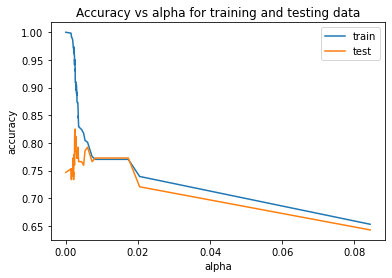

Max test accuracy is 0.8246753246753247 and occurs at alpha 0.0026058631921824097


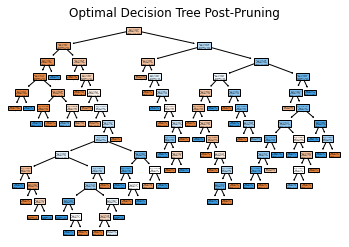

Number of leaves pre-pruning: 112
Number of leaves post-pruning: 61
Final depth: 13


In [20]:
path = dt.cost_complexity_pruning_path(X_train,y_train) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] 

for alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


#print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data")
ax.plot(ccp_alphas, train_scores , label="train")
ax.plot(ccp_alphas, test_scores, label="test")
ax.legend()
plt.show()

best_dt = clfs[test_scores.index(max(test_scores))]
print("Max test accuracy is", max(test_scores), "and occurs at alpha", best_dt.ccp_alpha)


tree.plot_tree(clfs[test_scores.index(max(test_scores))], filled=True)
plt.title("Optimal Decision Tree Post-Pruning")
plt.show()

print("Number of leaves pre-pruning:", dt.get_n_leaves())
print("Number of leaves post-pruning:", best_dt.get_n_leaves())
print("Final depth:", best_dt.get_depth())


After undergoing the pruning procedure, we achieve an 81% test accuracy, but which still yields a rather overfit tree, despite having reduced the original tree by about half. Next, let's see what accuracy can be achieved with a Random Forest Classfier. 

#### Random Forest Classifier

In [21]:
rf = RandomForestClassifier(random_state = 12).fit(X_train, y_train)


In [22]:
print("Unmodified Random Forest has training score of", 
      rf.score(X_train, y_train), 
      "and test score of", 
      rf.score(X_test, y_test))


Unmodified Random Forest has training score of 1.0 and test score of 0.8116883116883117


Interestingly, we see here that the initial training and test score of the unmodified Random Forest has a test score that is worse than the single Decision Tree Classifier optimized with ccp_alpha pruning. Since it successfully categorized 100% of the training data, we can perhaps assume that this is due to overfitting.

In [23]:
print("Max depth of all estimator trees in rf:", 
      max([dt.get_depth() for dt in rf.estimators_]))
print("Number of estimators in rf:", len(rf.estimators_))

Max depth of all estimator trees in rf: 22
Number of estimators in rf: 100


Indeed, we can see that the max depth of the largest tree of this Random Forest is 22, much larger than the tree that we optimized in the previous section. Let's now try using GridSearchCV to optimize over a number of different tree sizes and total estimators. We'll center on a max_depth parameter of 13, since that was our optimal post-pruning tree in the previous step. 

In [24]:
clf = RandomForestClassifier(n_jobs = -1, random_state = 12)

parameters = {'n_estimators':np.arange(50, 1050, 50),
              'max_depth':np.arange(10,20)}

grid = GridSearchCV(estimator = clf, 
                    param_grid = parameters, 
                    n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])})

In [25]:
best_rf = grid.best_estimator_

print(f'Optimal Random Forest model has max depth {best_rf.max_depth}, with {best_rf.n_estimators} estimators.')

print(f'Final test data accuracy: {best_rf.score(X_test, y_test):.2%}')

print(f'Cross validation score: {grid.best_score_:.2%}')

Optimal Random Forest model has max depth 18, with 100 estimators.
Final test data accuracy: 81.17%
Cross validation score: 77.52%


Here, we see the relative tradeoff between accuracy score and cross-validation score. the GridSearchCV tool optimizes the estimators (here RandomForestClassifiers) across the grid of specified parameters according to the mean cross validation score (here using the default of 5 folds). This method optimizes our parameters as a max_depth of 18 and a n_estimators of 100 (interestingly, the default n_estimator value for RandomForestClassifier). 

If we were to take a brute force approach, without using the cross-validation method, we might find different parameters, and a different, perhaps even greater accuracy score. In initially tweaking this model to achieve the best accuracy score on the test data, I found a particular parameter combination that performs even better:

In [26]:
test_depth = 13
test_est = 50

test_rf = RandomForestClassifier(max_depth = test_depth, n_estimators = test_est, random_state = 12)
test_rf.fit(X_train, y_train)

test_acc_score = test_rf.score(X_test, y_test)
test_cv = np.mean(cross_val_score(test_rf, X_train, y_train))

print(test_rf)
print(f'Test data score: {test_acc_score:.2%}')
print(f'Cross validation Score: {test_cv:.2%}')


RandomForestClassifier(max_depth=13, n_estimators=50, random_state=12)
Test data score: 83.12%
Cross validation Score: 75.73%


In this example, we see that it is possible to tweak the model parameters on the test data until we achieve an optimal score, but that could constitute a sort of "post-hoc" approach in which we were overfitting the model to the test data. Cross validation prevents this, and the model that was optimized for the test data alone has, in fact, an inferior cross validation score. 

In summary, we see that the optimum random forest model, using cross validation, has an inferior score final accuracy on the test data, but is in fact a more robust, less overfitted model. We can ascribe the fact that the final accuracy of 81.17% is roughly equal to that of a single decision tree to the fact that with this few parameters, the decision tree achieves a certain stability that's not necessarily overcome by expanding the model into a random forest. In the spirit of Occam's Razor, we can default to the simpler model, the Decision Tree, in this case. 

Next, we'll see what we can achieve with the AdaBoost ensemble method. 

#### AdaBoost

In [27]:
ada_clf = AdaBoostClassifier(random_state=12)
ada_clf.fit(X_train, y_train)

print(f'AdaBoost initial test accuracy score is {ada_clf.score(X_test, y_test):.2%}')


AdaBoost initial test accuracy score is 74.68%


From this number, we'll use the same GridSearchCVapproach to see if we can improve on this score. 

In [28]:
clf = AdaBoostClassifier(random_state=12)

parameters = {'n_estimators':np.arange(100, 210, 10), 
              'learning_rate':[0.01, 0.1, 1, 10]}

grid_ada = GridSearchCV(estimator = clf, 
                        param_grid = parameters)

grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=12),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])})

In [29]:
print(grid_ada.best_params_)
print(grid_ada.best_score_)

{'learning_rate': 0.1, 'n_estimators': 190}
0.7621884579501532


In [30]:
best_ada = grid_ada.best_estimator_
l_rate = best_ada.get_params()['learning_rate']
n_est = best_ada.get_params()['n_estimators']
acc_score = best_ada.score(X_test, y_test)

print(f'Optimal AdaBoost model has learning rate {l_rate}, with {n_est} estimators.')

print(f'Final test data accuracy: {acc_score:.2%}')

Optimal AdaBoost model has learning rate 0.1, with 190 estimators.
Final test data accuracy: 79.87%


Comparing the two ensemble methods attempted here, we can see that AdaBoost yields, in fact, a slightly worse final accuracy score than the other two previously studied methods, though only moderately so. 

### Conclusion

To conclude, this dataset presents a model case study in the principal that complex and heavily-layered models are not necessarily always better. The number of rows (768) and features (8) are both relatively small. In this case, the final test data accuracy of a single Decision Tree, pruned using the ccp_alpha procedure, yielded a better overall classifier than either the Random Forest or the AdaBoost classifiers. Let's take a look at the classification reports for our three final models:

In [31]:
print("Decision Tree Classification Report:", '\n', classification_report(y_test, best_dt.predict(X_test)), '\n')
print("Random Forest Classification Report:", '\n', classification_report(y_test, best_rf.predict(X_test)), '\n')
print("AdaBoost Classification Report:", '\n', classification_report(y_test, best_ada.predict(X_test)), '\n')

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        99
           1       0.79      0.69      0.74        55

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154
 

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154
 

AdaBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.75      0.65      0.70        55

    accuracy                           0.80       154
   macro avg

In the course of tuning the hyperparameters of our models, I focused on accuracy as the most relevant measure, both because of its intelligibility as well as the fact that our classification values were not terribly unbalanced - as we saw during our EDA, we had an approximately 1:2 ratio of diabetic to non-diabetic patients. 

However, it's important to keep in mind that other classification metrics exist, and that they should all be considered in the course of training and selecting a model. Recall and precision, in particular, can be of great use in contexts where outright classification accuracy. Luckily, we can see here that the weighted average of both precision and recall roughly agree with the accuracies of all three of the models that we trained. This confirms our use of the accuracy metric earlier on. 

In summary, it's important to reiterate that the use of more complex modelling methods may not be warranted in certain contexts. Here, I attempted the use of three distinct tree-based methods in order to compare and contrast their effectiveness. To my surprise, the most basic model (a well-pruned Decision Tree Classifier) gave even better results than two ensemble methods that I attempted. It appears that rather small dataset and modest number of features led to a stable Decision Tree, and the performance was not improved with more sophisticated and computationally expensive models. Further study could be performed to see if other parametric (logistic classification) or non-parametric (KNN or SVM) classifiers would be even more successful. 

### References

National Research Council (US) Committee on Population; Sandefur GD, Rindfuss RR, Cohen B, editors. Changing Numbers, Changing Needs: American Indian Demography and Public Health. Washington (DC): National Academies Press (US); 1996. 12, Diabetes Mellitus in Native Americans: The Problem and Its Implications. Available from: https://www.ncbi.nlm.nih.gov/books/NBK233089/

Naz H, Ahuja S. Deep learning approach for diabetes prediction using PIMA Indian dataset. J Diabetes Metab Disord. 2020;19(1):391-403. Published 2020 Apr 14. doi:10.1007/s40200-020-00520-5

Centers for Disease Control and Prevention. National Diabetes Statistics Report, 2020. Atlanta, GA: Centers
for Disease Control and Prevention, U.S. Dept of Health and Human Services; 2020.

Schulz LO, Chaudhari LS. High-Risk Populations: The Pimas of Arizona and Mexico. Curr Obes Rep. 2015;4(1):92-98. doi:10.1007/s13679-014-0132-9